# Data Profiling
- Imports dataset as a `pandas` dataframe
- Prints data profile report for each feature of dataframe
- Outputs data profile report to `.json` and `.csv` 
- Visualizes dataset with `seaborn` `.pairplot()` and `.heatmap()` (optional) and exports `.png`

## Import Modules

In [1]:
import pandas
import numpy
import random
import datetime
import math
import seaborn
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
seaborn.set(rc = {"figure.figsize":(16,12)})
seaborn.set_style("whitegrid")

In [3]:
# get timestamp
now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d") + "_"

print("Timestamp set to: {}".format(timestamp))

Timestamp set to: 20180808_


## Settings

#### Data settings

In [4]:
#Read in data from excel or csv using read_excel or read_csv method
#If read_excel is used make sure you include sheet_name parameter

datapath = "/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/titanic.csv"

data = pandas.read_csv(datapath)

print("Dataframe has {} features and {} records".format(data.shape[1], data.shape[0]))
print("Dataframe feature names:")
print(list(data.columns))

Dataframe has 15 features and 891 records
Dataframe feature names:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


#### Export path
- Data profile reports get sent to this location
- Visualizations also get sent to this location

In [5]:
exportpath = "/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/"

print("Export path set to '{}'".format(exportpath))

Export path set to '/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/'


#### Report Settings 

In [6]:
# Set report width, this will be used to calculate padding 
# between attributes and their corresponding values
report_width = 80
just_width = math.floor(report_width / 2)

# Set spacing char for header and attribute of reports
attribute_spacing_char = " "
header_spacing_char = "~"

print("Report width set to {}".format(report_width))
print("Attribute spacing char set to '{}'".format(attribute_spacing_char))
print("Header spacing char set to '{}'".format(header_spacing_char))

Report width set to 80
Attribute spacing char set to ' '
Header spacing char set to '~'


#### Visualization Settings
- Dataset will be visualized using `seaborn`'s `.pairplot()`
- If dataset has high dimensionality you may want to skip visualization step.
- More information about colour paletttes https://seaborn.pydata.org/tutorial/color_palettes.html

In [7]:
visualize_dataset = True

# Filters out cetgorical features to visualize
# Features with unique members in between this range will be plotted
nunique_range = [2,10]

# Features to exclude (list), you may want to exclude features from visualization, such as primary keys/foreign keys
features_to_exclude = []

# Examples 
# palette = "rainbow"
# palette = ["red", "blue", "green", "orange"])
# palette = ["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

palette = "Dark2"

# Sets the type of visualization for non identity pairings
# Types available 'kde' (kernel density), 'hist' (histogram)
identity_type = 'hist'

# Sets the type of visualization for non identity pairings
# Types available 'scatter', 'reg' (regression)
non_identity_type = 'scatter'

### Helper function to generate data

In [8]:
def generate_dynamic_random_code(code_length):
    
    characters_string = "abcdefghijklmnopqrstuvwxyz1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    listchar = list(characters_string)
    
    placeholder_string = "-" * code_length
    
    placeholders = list(placeholder_string)
    
    for index in range(len(placeholders)):
    
        random_index = random.randint(0,len(listchar) - 1)
    
        character = listchar[random_index]
    
        placeholders[index] = character
    
    code = "".join(placeholders)
    
    return code

In [9]:
def generate_float_frame(row_count, column_count, assign_col_names = False, nullperc = 0.04):
    
    data = pandas.DataFrame(numpy.random.random((row_count, column_count)))
    
    if assign_col_names == True:
        
        columns = []
        while len(columns) < column_count:
            
            columns.append(generate_dynamic_random_code(8))
            
        data.columns = columns
    
    if nullperc < 0 or nullperc >100:
        nullperc = 0.2
        print("percentage of nulls defaulted to 0.2")
    
    total_cells = data.shape[0] * data.shape[1]
    
    null_cells = int(total_cells * nullperc)
    
    for iteration in range(null_cells):
        
        r_index = random.randint(0,row_count - 1)
        c_index = random.randint(0, column_count - 1)
        data.iloc[r_index, c_index] = None
    
    return data

### Import/Create Data

### Usage Example for `generate_float_frame`
```python
data = generate_float_frame(row_count = 400, #dataframe to have 400 rows
                            column_count = 6, # dataframe to have 6 columns
                            assign_col_names = True, # assign random strings as column names
                            nullperc = 0.05) # approx 5% dataframe has null cells
```

## Extract Profile

### Get Statistical Summary

In [10]:
#call pandas describe method on dataframe
describe = data.describe(include = "all")

#transpose
describe_transposed = describe.T

#reset_index, moving the column names into a new series
describe_final = describe_transposed.reset_index()

In [11]:
describe_final

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
1,pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
2,sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
4,sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
5,parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
6,fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
7,embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get Data Types

In [12]:
# get datatypes of each feature
dtypes = data.dtypes

In [13]:
#convert to dataframe and rename a column
dtypes_dataframe = pandas.DataFrame(dtypes, columns = ["data_type"])

In [14]:
# reset index, moving the column names into a new series
dtypes_final = dtypes_dataframe.reset_index()

In [15]:
# preview
dtypes_final.head()

,index,data_type
0,survived,int64
1,pclass,int64
2,sex,object
3,age,float64
4,sibsp,int64


### Get Null composition

In [16]:
#use notnull() and isnull() methods combined with sum() to
#get null composition of dataset
filled_count_series = data.notnull().sum().astype(int)
null_count_series = data.isnull().sum().astype(int)

#get amount of rows in dataset
totalcount = data.shape[0]

In [17]:
#create percentage series based on series above
percent_null =  null_count_series / totalcount
percent_filled = filled_count_series / totalcount

In [18]:
percent_null = percent_null.reset_index().rename(columns = {0:"null_percent"})
percent_filled = percent_filled.reset_index().rename(columns = {0:"non_null_percent"})
filled_count_series = filled_count_series.reset_index().rename(columns = {0:"non_null_counts"})
null_count_series = null_count_series.reset_index().rename(columns = {0:"null_counts"})

In [19]:
from functools import reduce

In [20]:
null_info_dataframe = reduce(lambda left,right: pandas.merge(left,right,on='index'), [percent_null,
                                                                                 percent_filled,
                                                                                 filled_count_series,
                                                                                 null_count_series])

In [21]:
null_info_dataframe.head()

,index,null_percent,non_null_percent,non_null_counts,null_counts
0,survived,0.000000,1.000000,891,0
1,pclass,0.000000,1.000000,891,0
2,sex,0.000000,1.000000,891,0
3,age,0.198653,0.801347,714,177
4,sibsp,0.000000,1.000000,891,0



### Merge all

In [22]:
merged = reduce(
    lambda left, right: pandas.merge(left, right, on='index', how="left"),
    [null_info_dataframe, dtypes_final, describe_final])

### Cleanup

#### Drop count column

In [23]:
merged["row_count"] = totalcount

merged.drop(["count"], axis = 1, inplace = True)

In [24]:
merged

,index,null_percent,non_null_percent,non_null_counts,null_counts,data_type,unique,top,freq,mean,std,min,25%,50%,75%,max,row_count
0,survived,0.000000,1.000000,891,0,int64,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1,891
1,pclass,0.000000,1.000000,891,0,int64,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3,891
2,sex,0.000000,1.000000,891,0,object,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891
3,age,0.198653,0.801347,714,177,float64,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80,891
4,sibsp,0.000000,1.000000,891,0,int64,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8,891
5,parch,0.000000,1.000000,891,0,int64,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6,891
6,fare,0.000000,1.000000,891,0,float64,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329,891
7,embarked,0.002245,0.997755,889,2,object,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891
8,class,0.000000,1.000000,891,0,object,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891
9,who,0.000000,1.000000,891,0,object,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891


In [25]:
# Fill in gaps in unique column wiht nunique method

for index in range(merged.shape[0]):
    
    unique_value = merged.loc[index, "unique"]
    
    if numpy.isnan(unique_value):
        
        feature_name = merged.loc[index, "index"]
        
        
        number_of_uniques = data[feature_name].nunique()
        merged.loc[index, "unique"] = number_of_uniques
        print("Feature {} unique values being calculated and adjusted to {}".format(feature_name, number_of_uniques))

Feature survived unique values being calculated and adjusted to 2
Feature pclass unique values being calculated and adjusted to 3
Feature age unique values being calculated and adjusted to 88
Feature sibsp unique values being calculated and adjusted to 7
Feature parch unique values being calculated and adjusted to 7
Feature fare unique values being calculated and adjusted to 248


#### Change types

In [26]:
merged["data_type"] = merged["data_type"].astype(str)

#### Round values

In [27]:
rounded_places = 4

for column in ["mean", "std", "min", "25%", "50%", "75%", "max"]:
    
    merged[column] = merged[column].astype(float).round(rounded_places)

### Create Data Profile Dictionary

In [28]:
profile_dict = {}

In [29]:
# Store list of features relevant to dictionary
merged_attributes = list(merged.columns)
merged_attributes.remove("index")

# Iterate through merged records
for index in range(merged.shape[0]):
    
    # Store column name
    column = merged.loc[index, "index"]
    
    # Create empty list, to store sub dictionaries in
    profile_dict[column] = []
    
    # For each attribute in merged_attributes list do this
    for attr in merged_attributes:
        
        # Locate the value of the attribuet for a given record
        value = merged.loc[index, attr]
        
        # Append dictionary to list within main dictionary
        profile_dict[column].append({attr: value})

### Export results as .json and .csv

#### Helper Function to convert invalid json values

In [30]:
# will try to convert a value to a float, followed by string,
# if the float conversion fails

def convert_invalid_values(value):
    
    try:
        new_value = float(value)
    except:
        new_value = str(value)

    return new_value

#### Export as json

In [31]:
with open(exportpath + "profile.json", "w") as fileobj:
    # for errors I want to attempt to convert the value to a float before str using
    # the function defined above
    json.dump(profile_dict, fileobj, default = convert_invalid_values)
    
fileobj.close()

#### Export as csv

In [32]:
merged.to_csv(exportpath + "profile.csv", index = False)

## Report Results 

In [45]:
total_keys = len(profile_dict.keys())
column_number = 0

In [46]:


for key in profile_dict.keys():
    
    # Increment column number
    column_number = column_number + 1
    
    # Calculate column pos
    column_pos = " ({}/{})"
    
    print("\n", (" " + key + " ").center(report_width, header_spacing_char))
    
    sub_dictionary = profile_dict[key]
    for dictionary in sub_dictionary:
        
        keys = list(dictionary.keys())
        attribute = keys[0]
        value = dictionary[attribute]
        
        if "percent" in attribute:
            formatted_value = "{0:.2%}".format(value)
        else:
            formatted_value = str(value)
        
        print(attribute.ljust(just_width, attribute_spacing_char), 
              formatted_value.rjust(just_width, attribute_spacing_char))


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ survived ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
null_percent                                                                0.00%
non_null_percent                                                          100.00%
non_null_counts                                                               891
null_counts                                                                     0
data_type                                                                   int64
unique                                                                          2
top                                                                           nan
freq                                                                          nan
mean                                                                       0.3838
std                                                                        0.4866
min                                                                           0.0
25%            

## Visualizations
(Optional)

### Pairplot

#### Create subset of data without nulls for visualizing

In [34]:
if visualize_dataset == True:
    data_no_nulls = data.dropna(how = "any", 
                            axis = 0)

In [35]:
if visualize_dataset == True:
    print(data_no_nulls.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


#### Remove unwanted features from visualization dataset

In [36]:
if visualize_dataset == True:
    for feature in features_to_exclude:
        if feature in data_no_nulls.columns:
            data_no_nulls.drop([feature], axis = 1, inplace = True)
            print("{} removed from visualization dataset".format(feature))

##### Default parameters
```python
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
```

#### Calculate chosen_categorical_features (features with unique number of items between given range)

In [37]:
if visualize_dataset == True:

    # Create subset of merged containing data type = object and nunique between range above
    chosen_categorical_features = list(merged[(merged["unique"] >= nunique_range[0]) & 
                               (merged["unique"] <= nunique_range[1]) & 
                               (merged["data_type"] == "object")]["index"])

    print(chosen_categorical_features)

    # Remove unwanted features
    for feature in features_to_exclude:
        if feature in chosen_categorical_features:
            chosen_categorical_features.remove(feature)

    # Preview chosen_categorical_features
    print(chosen_categorical_features)

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


#### Calculate which columns can be used as categories to split float data in pairplots
- Note: code hasn't accounted for datasets without float/int features yet.

#### Convert bool dtypes before visualizing, as this produces errors otherwise 

In [38]:
for column in data_no_nulls.columns:
    dtype = data_no_nulls[column].dtype
    if dtype == "bool":
        data_no_nulls[column] = data_no_nulls[column].astype(str)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [39]:
data_no_nulls.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male      object
deck            object
embark_town     object
alive           object
alone           object
dtype: object

<Figure size 1152x864 with 0 Axes>

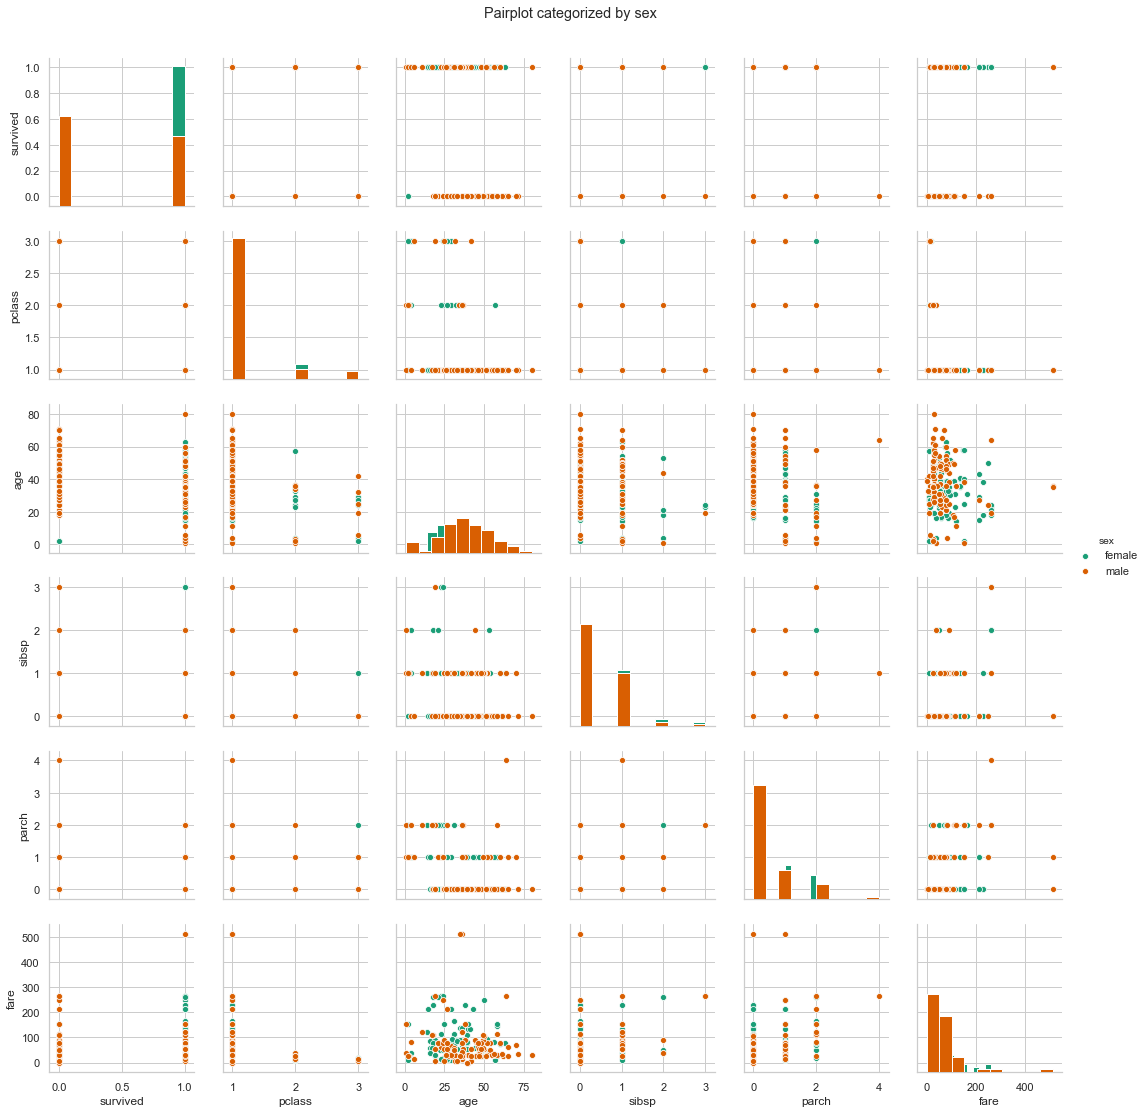

<Figure size 1152x864 with 0 Axes>

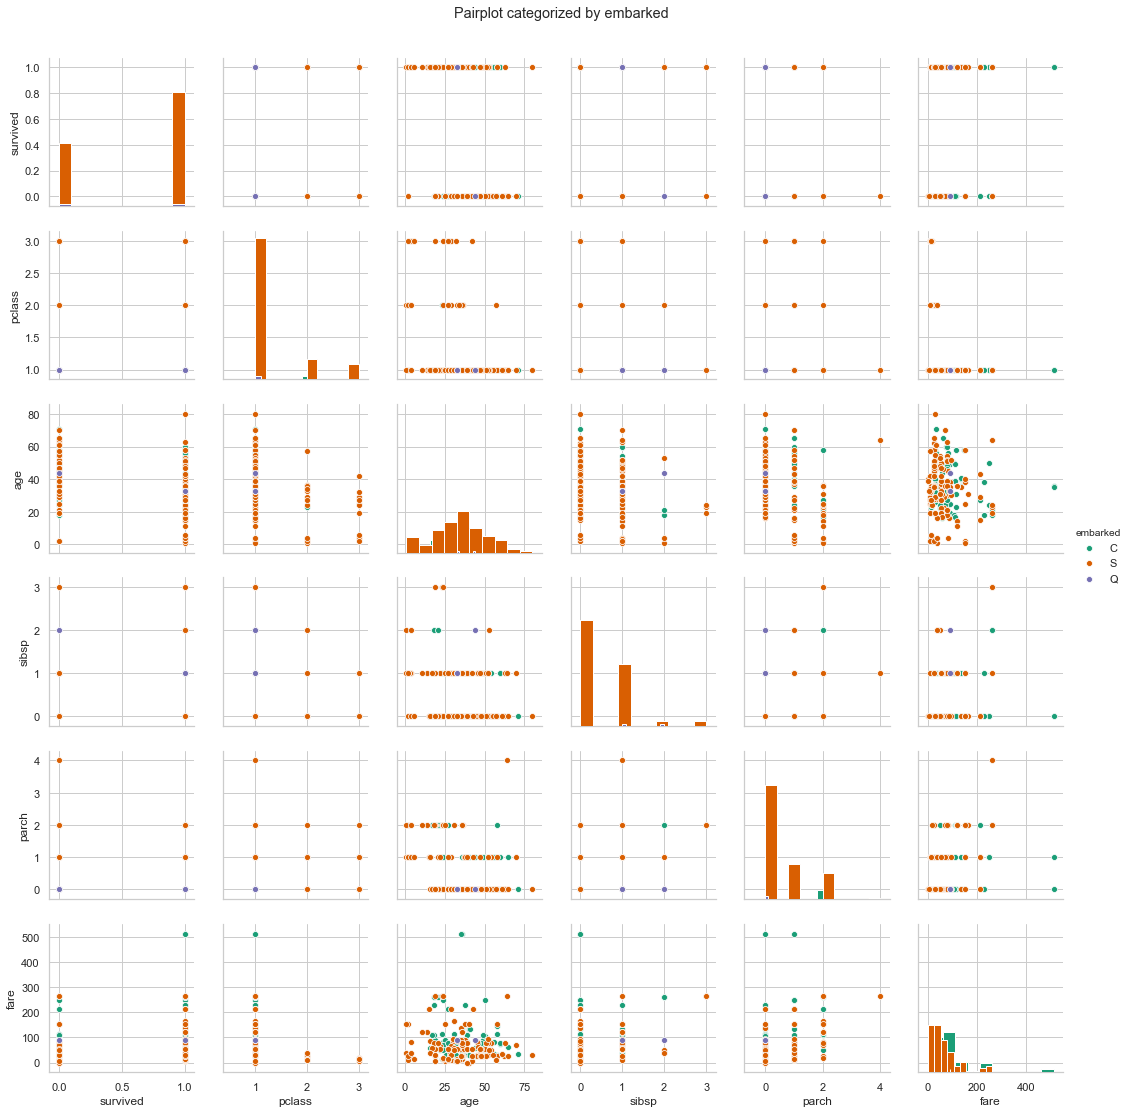

<Figure size 1152x864 with 0 Axes>

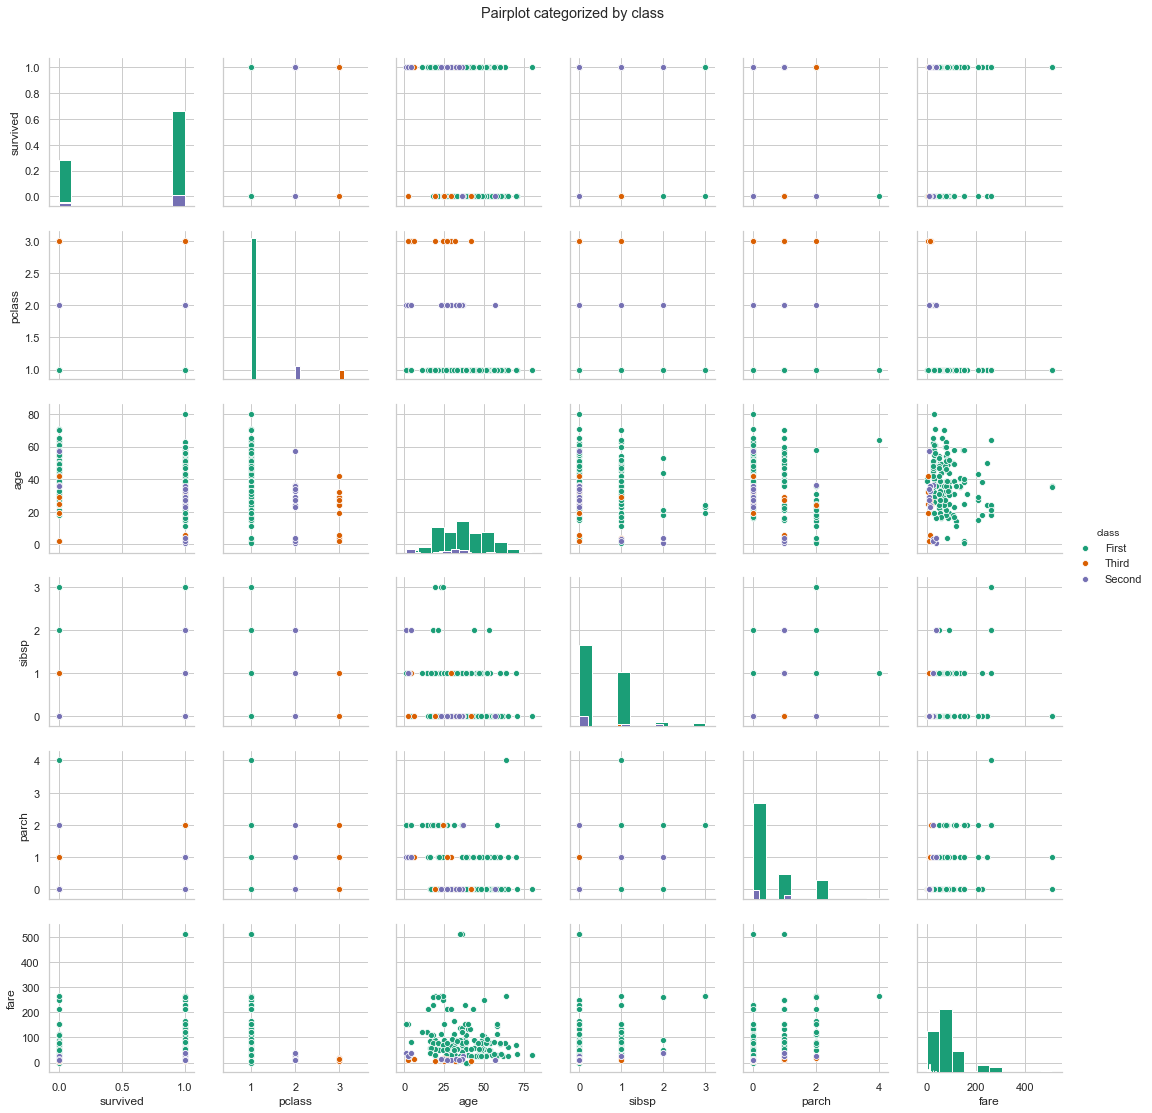

<Figure size 1152x864 with 0 Axes>

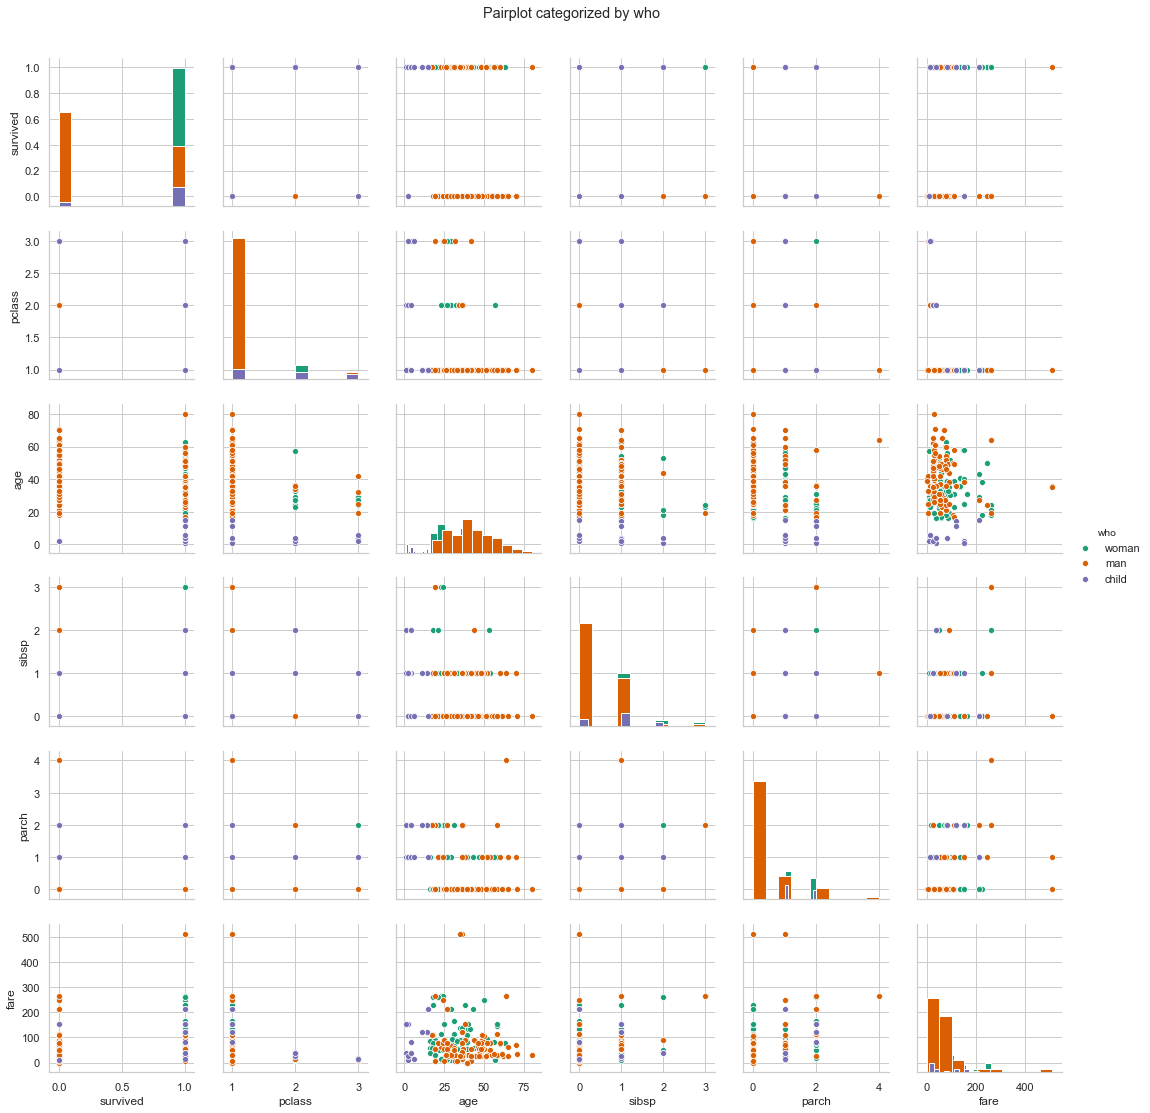

<Figure size 1152x864 with 0 Axes>

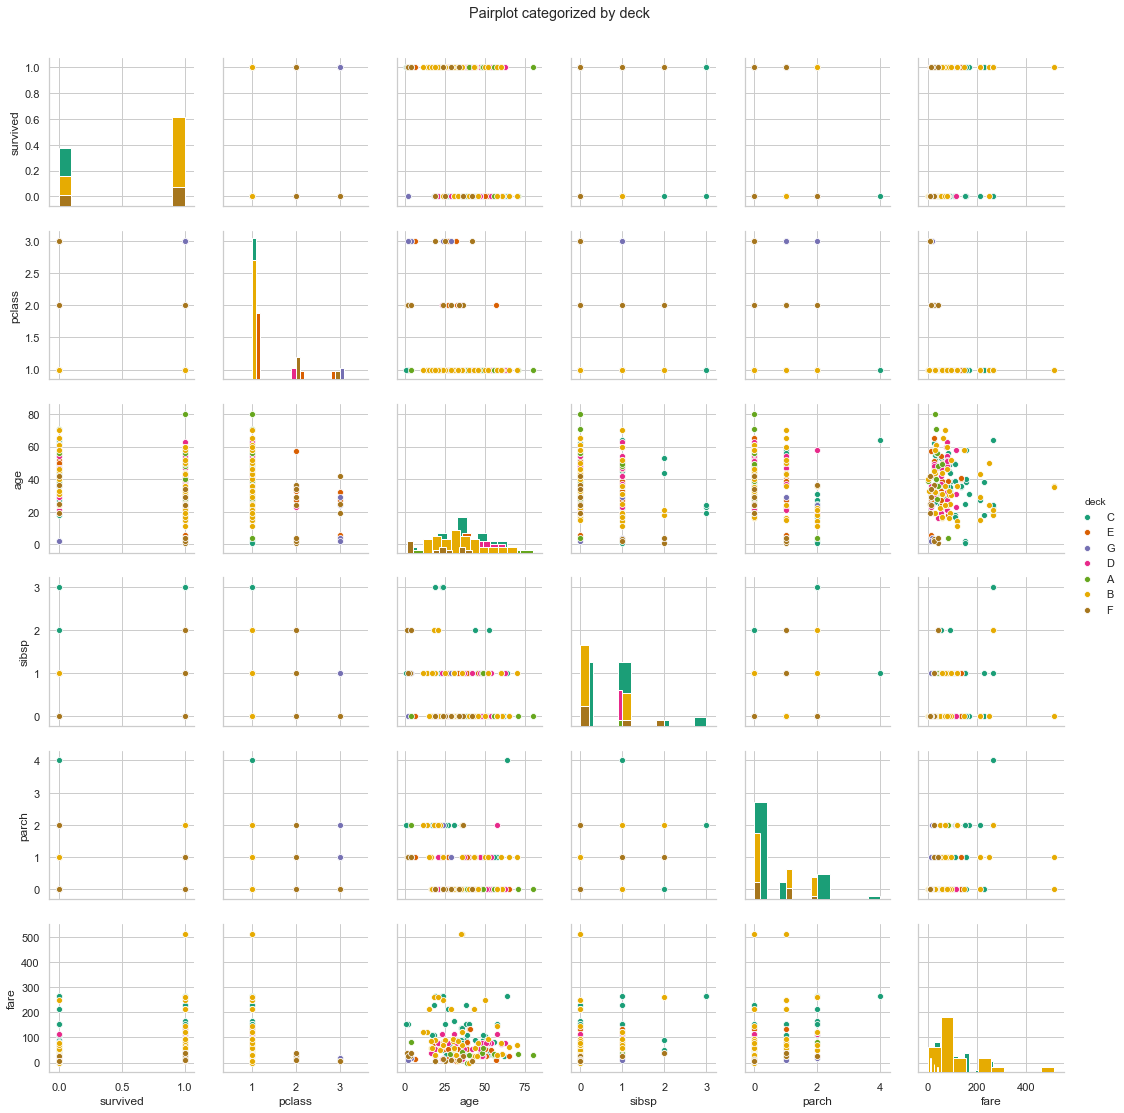

<Figure size 1152x864 with 0 Axes>

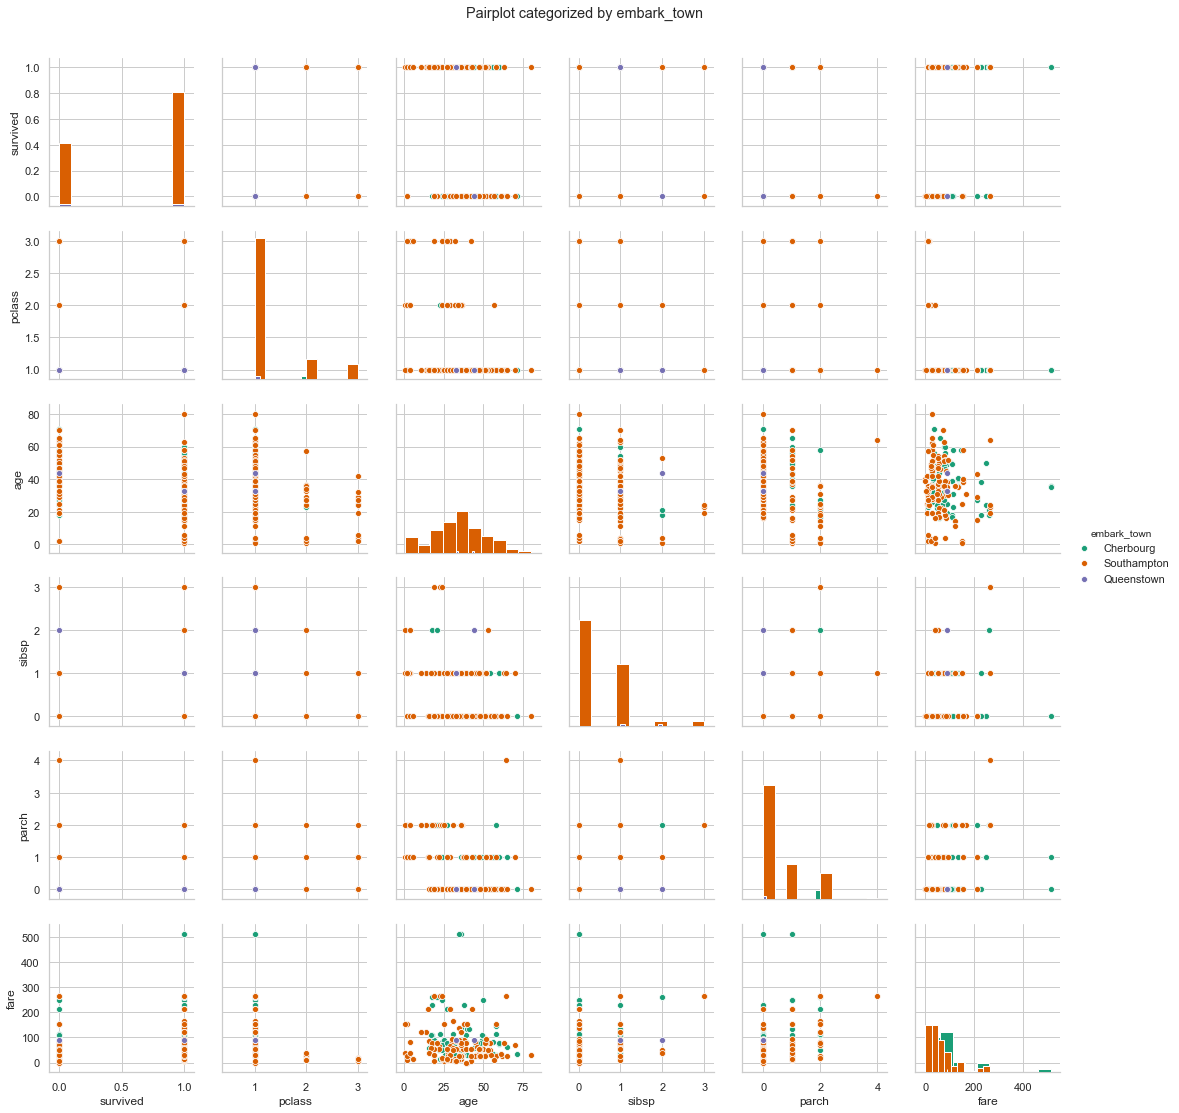

<Figure size 1152x864 with 0 Axes>

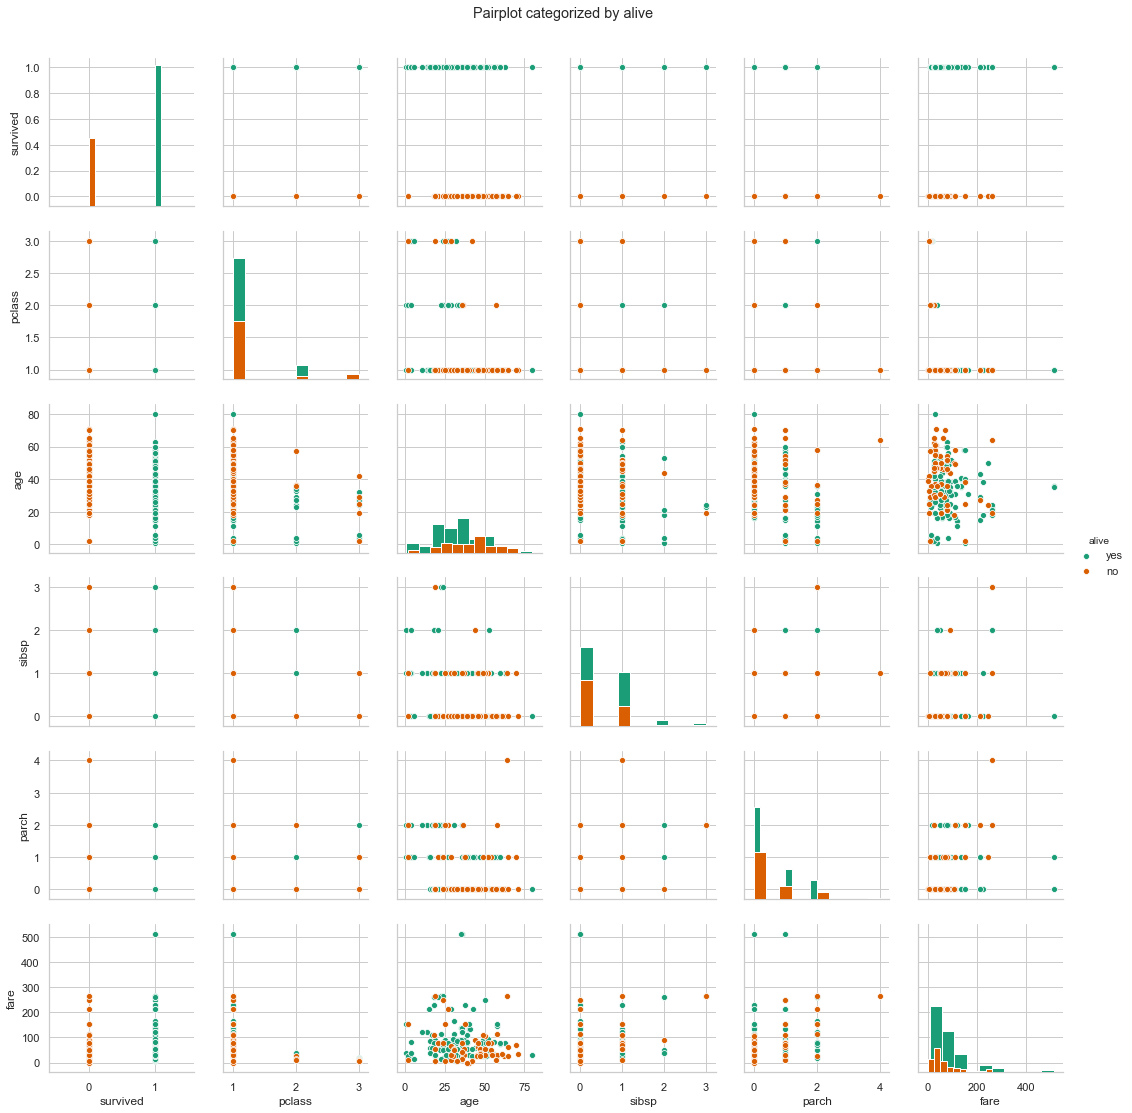

In [40]:
if visualize_dataset == True:
    # If dataset contains at least one categorical feature do this
    if "unique" in merged.columns:

        for column in chosen_categorical_features:

            plt.figure()
            myplot = seaborn.pairplot(data = data_no_nulls, 
                                      kind = non_identity_type,
                                      diag_kind = identity_type,
                                      hue = column,
                                      palette = palette
                                     )

            myplot.fig.suptitle("Pairplot categorized by {}".format(column), 
                         y = 1.03)

            plt.savefig(exportpath + timestamp +  column + "_pairplot.png")

    # If data set has no categorical features (only floats/ints) do this
    else:

        plt.figure()

        myplot = seaborn.pairplot(data = data_no_nulls, 
                                  kind = non_identity_type,
                                  diag_kind = identity_type
                                 )

        myplot.fig.suptitle("Pairplot", 
                     y = 1.03)

        plt.savefig(exportpath + timestamp +  "data_profile_pairplot.png")

### Correlation Heatmap

In [41]:
seaborn.set(rc = {"figure.figsize":(16,14)})

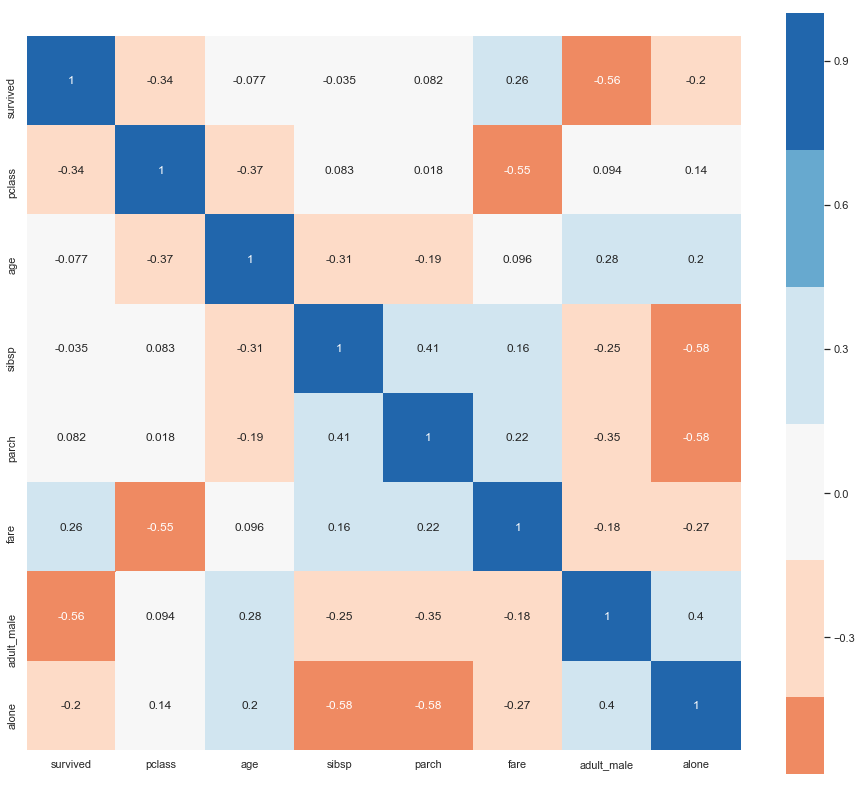

In [42]:
if visualize_dataset == True:
    
    #Create correlation Matrix
    correlation_dataframe = data.corr()
    
    #Create heatmap, show and export as .png
    seaborn.heatmap(data = correlation_dataframe,
               cmap = ['#b2182b',
                    '#ef8a62',
                    '#fddbc7',
                    '#f7f7f7',
                    '#d1e5f0',
                    '#67a9cf',
                    '#2166ac'],
               center = 0,
               square = True,
               annot = True).get_figure().savefig(exportpath + timestamp + "heatmap.png")